In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [231]:
url = 'https://raw.githubusercontent.com/Mayank1467/Datasets/main/Flipkart_Mobiles.csv'

In [232]:
df1 = pd.read_csv(url)

In [233]:
df1.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [234]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   object 
 4   Storage         3075 non-null   object 
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


In [235]:
# adding a Profit column
df1['Discount'] = df1['Original Price'] - df1['Selling Price']

In [236]:
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,Discount
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990,4000
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990,4000
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990,4000
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990,4000
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990,4000


## Data Preprocessing

### Handling Null Values

In [237]:
# checking for Null values
na_features = df1.columns[df1.isna().any()]
na_features

Index(['Memory', 'Storage', 'Rating'], dtype='object')

In [238]:
# checking for ratio of Null values
for feature in na_features:
    print({feature: df1[feature].isna().sum() / len(df1)})

{'Memory': 0.013808606294155427}
{'Storage': 0.012524084778420038}
{'Rating': 0.046242774566473986}


In [239]:
# handling categorical Null values
for feature in ['Memory', 'Storage']:
    df1[feature].fillna(df1[feature].mode()[0], inplace=True)

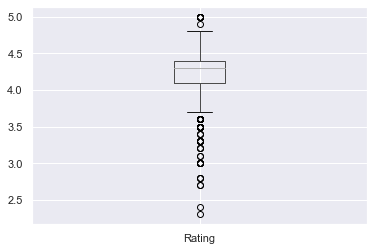

In [240]:
# visualizing distribution of Rating columns
_ = df.boxplot(column='Rating')

- Presence of samll number of outliers found in the distribution and hence we can use median to replace the values.

In [241]:
# handling numerical Null values
df1.Rating.fillna(df1.Rating.median(), inplace=True)

In [242]:
# rechecking for Null values
df1.isna().sum()

Brand             0
Model             0
Color             0
Memory            0
Storage           0
Rating            0
Selling Price     0
Original Price    0
Discount          0
dtype: int64

In [243]:
df1.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,Discount
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990,4000
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990,4000
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990,4000
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990,4000
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990,4000


### Handling Categorical Features

In [244]:
# getting all unique categories
for feature in ['Memory', 'Storage']:
    print(feature)
    print(df1[feature].unique(), '\n')

Memory
['4 GB' '6 GB' '3 GB' '8 GB' '2 GB' '12 GB' '1 GB' '512 MB' '1.5 GB'
 '768 MB' '16 GB' '18 GB' '8 MB' '64 MB' '4 MB' '32 MB' '16 MB' '128 MB'
 '4GB' '153 MB' '2 MB' '10 MB' '46 MB' '32 GB' '100 MB' '30 MB'] 

Storage
['64 GB' '128 GB' '32 GB' '256 GB' '16 GB' '8 GB' '4 GB' '512 GB' '16 MB'
 '128 MB' '2 MB' '4 MB' '48 MB' '8 MB' 'Expandable Upto 32 GB'
 'Expandable Upto 16 GB' '10 MB' '256 MB' '140 MB' '64 MB' '1 TB' '153 MB'
 '512 MB' '100 MB' '129 GB' '130 GB'] 



- Inconsistency in the data is found. Replacing '4GB' with '4 GB'.

In [245]:
# replacing 4GB with 4 GB
for feature in ['Memory', 'Storage']:
    temp_dict = {'4GB': '4 GB'}
    df1[feature].replace(temp_dict, inplace=True)

### Handling Rare Categorical Features

In [246]:
# finding ratio of different categories
for feature in ['Memory', 'Storage']:
    print(feature)
    print(df1[feature].value_counts() / len(df), '\n')

Memory
4 GB      0.298651
3 GB      0.159923
6 GB      0.159602
2 GB      0.125241
8 GB      0.110790
1 GB      0.061978
12 GB     0.020231
512 MB    0.014772
4 MB      0.012524
1.5 GB    0.009313
16 MB     0.005138
64 MB     0.004817
8 MB      0.004496
32 MB     0.004496
768 MB    0.001927
128 MB    0.001285
10 MB     0.000963
18 GB     0.000642
46 MB     0.000642
16 GB     0.000642
2 MB      0.000642
153 MB    0.000321
32 GB     0.000321
30 MB     0.000321
100 MB    0.000321
Name: Memory, dtype: float64 

Storage
64 GB                    0.261079
128 GB                   0.245344
32 GB                    0.178227
16 GB                    0.103404
256 GB                   0.077071
8 GB                     0.042710
512 GB                   0.021516
4 GB                     0.017983
2 MB                     0.014451
4 MB                     0.008992
1 TB                     0.004496
16 MB                    0.004496
Expandable Upto 16 GB    0.003854
Expandable Upto 32 GB    0.003854
128

In [247]:
# handling classes with less than 5% data
df = df1.copy()
for feature in ['Memory', 'Storage']:
    ratio = df[feature].value_counts() / len(df)
    temp = ratio[ratio < 0.05].index
    df[feature] = np.where(df[feature].isin(temp), 'Others', df[feature])

In [248]:
# rechecking ratio of different categories
for feature in ['Memory', 'Storage']:
    print(feature)
    print(df[feature].value_counts() / len(df), '\n')

Memory
4 GB      0.298651
3 GB      0.159923
6 GB      0.159602
2 GB      0.125241
8 GB      0.110790
Others    0.083815
1 GB      0.061978
Name: Memory, dtype: float64 

Storage
64 GB     0.261079
128 GB    0.245344
32 GB     0.178227
Others    0.134875
16 GB     0.103404
256 GB    0.077071
Name: Storage, dtype: float64 



## Exploratory Data Analysis

### Checking for distribution of Selling Price

count      3114.000000
mean      28333.473025
std       31525.599889
min        1000.000000
10%        6990.000000
25%       10030.250000
50%       16889.500000
75%       31500.000000
90%       65999.000000
max      189999.000000
Name: Original Price, dtype: float64 



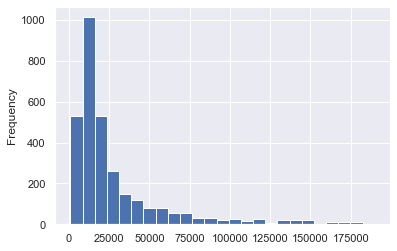

In [249]:
df['Original Price'].plot.hist(bins=25)
print(df['Original Price'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]),'\n')
plt.show()

- We can see that the distribution of Selling Price is right skewed with mean at 28333 and outliers towards the right.

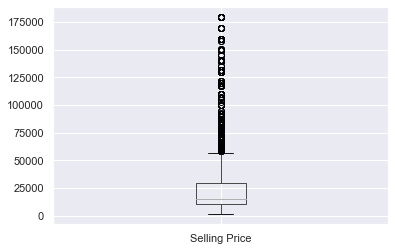

In [250]:
# visualizing outliers using boxplot
df.boxplot(column='Selling Price')
plt.show()

- We can verify the presence of large number of outliers towards the end of the distribution.
- 50% of the mobiles have prices equal to or below Rs. 16889. However owing to distribution being heavily right skewed, the mean becomes Rs. 28333.

### Checking for distribution of Discount

count     3114.000000
mean      1896.847463
std       5337.126176
min      -8000.000000
10%          0.000000
25%          0.000000
50%          0.000000
75%       2000.000000
90%       4901.000000
max      75000.000000
Name: Discount, dtype: float64 



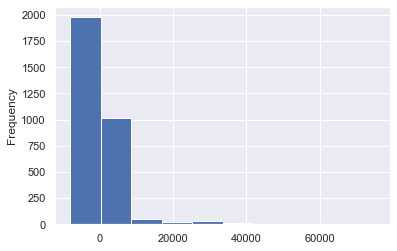

In [251]:
df['Discount'].plot.hist()
print(df['Discount'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]),'\n')
plt.show()

- The distribution of discount is similar to that of Selling Price i.e. it is heavily skewed towards right.
- Presence of outliers have risen the mean discount to Rs. 1896.

### Sale and Discount distribution by Brand

In [252]:
# list of unique brands
unique_brands = df.Brand.unique()
unique_brands

array(['OPPO', 'HTC', 'IQOO', 'Google Pixel', 'LG', 'ASUS', 'realme',
       'GIONEE', 'Nokia', 'Apple', 'SAMSUNG', 'Lenovo', 'Motorola',
       'POCO', 'vivo', 'Xiaomi', 'Infinix'], dtype=object)

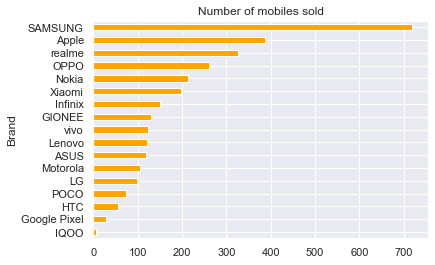

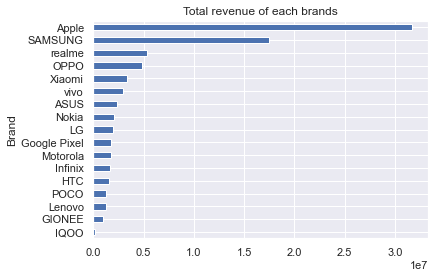

In [253]:
# visualizing sale of different brands
_ = df.groupby('Brand')['Selling Price'].count().sort_values(ascending=True).plot.barh(color='orange')
plt.title('Number of mobiles sold')
plt.show()
_ = df.groupby('Brand')['Selling Price'].sum().sort_values(ascending=True).plot.barh()
plt.title('Total revenue of each brands')
plt.show()

- Apple has the highest sales on Flipkart even though Samsung has sold the maximum number of mobiles followed by Iphone.

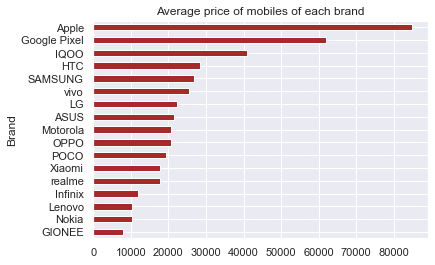

In [254]:
_ = df.groupby('Brand')['Original Price'].mean().sort_values(ascending=True).plot.barh(color='brown')
plt.title('Average price of mobiles of each brand')
plt.show()

- We can see that average price of Apple mobiles are way higher when compared to that of Samsung mobiles. Due to this, Apple tops the sales chart even though Samsung is quite ahead in terms of market volume.

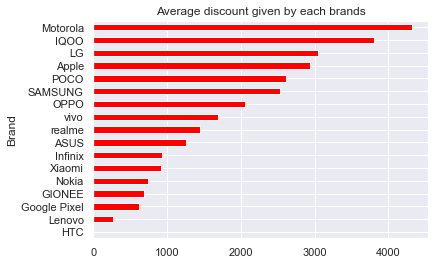

In [255]:
_ = df.groupby('Brand')['Discount'].mean().sort_values(ascending=True).plot.barh(color='red')
plt.title('Average discount given by each brands')
plt.show()

- Motorola is giving largest discount on their mobiles.

### Sale and Discount distribution by Memory

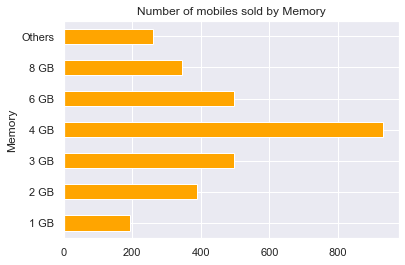

In [256]:
# number of mobiles of each memory type sold
_= df.groupby('Memory')['Selling Price'].count().plot.barh(color='orange')
plt.title('Number of mobiles sold by Memory')
plt.show()

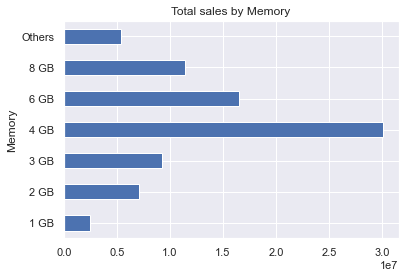

In [257]:
# total sale by memory
_= df.groupby('Memory')['Selling Price'].sum().plot.barh()
plt.title('Total sales by Memory')
plt.show()

- 4GB mobiles have dominated the market in terms of both total sales as well as market volume.

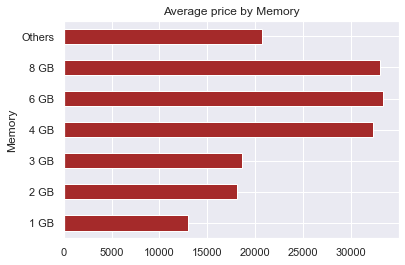

In [258]:
# average sale of each memory type
_= df.groupby('Memory')['Selling Price'].mean().plot.barh(color='brown')
plt.title('Average price by Memory')
plt.show()

- The average price for 4GB, 6GB and 8GB mobiles doesn't differ by much. On top of that, the average price of 6GB mobiles are higher than that of 8GB mobiles. Ideally this shouldn't have happened. Let's dig deeper to find out the reason.

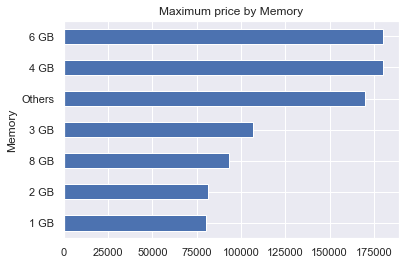

In [259]:
# getting the maximum price of different Memory type
_ = df.groupby('Memory')['Selling Price'].max().sort_values(ascending=True).plot.barh()
plt.title('Maximum price by Memory')
plt.show()

In [260]:
# getting the mobiles with maximum selling price
df[df['Selling Price'].isin(df['Selling Price'].nlargest())]

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,Discount
1233,Apple,iPhone 13 Pro Max,Sierra Blue,6 GB,Others,4.3,179900,179900,0
1255,Apple,iPhone 13 Pro Max,Gold,6 GB,64 GB,4.3,179900,179900,0
1351,Apple,iPhone 13 Pro Max,Gold,6 GB,Others,4.3,179900,179900,0
1414,Apple,iPhone 13 Pro Max,Graphite,6 GB,Others,4.3,179900,179900,0
1459,Apple,iPhone 13 Pro Max,Silver,6 GB,Others,4.3,179900,179900,0
3044,Apple,iPhone 13 Pro Max,Silver,4 GB,Others,4.7,179900,179900,0
3051,Apple,iPhone 13 Pro Max,Gold,4 GB,Others,4.7,179900,179900,0
3057,Apple,iPhone 13 Pro Max,Graphite,4 GB,Others,4.7,179900,179900,0
3058,Apple,iPhone 13 Pro Max,Sierra Blue,4 GB,Others,4.7,179900,179900,0


- We can see that the above anomaly is due to the presence of 'iPhone 13 Pro Max' in 4GB and 6GB categories which carries a hefty price tag of 179900.

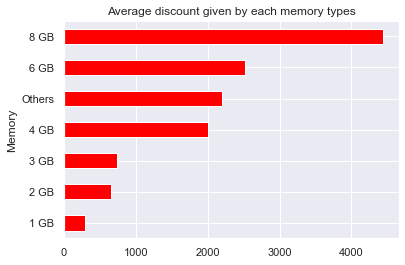

In [261]:
_ = df.groupby('Memory')['Discount'].mean().sort_values(ascending=True).plot.barh(color='red')
plt.title('Average discount given by each memory types')
plt.show()

- Mobiles with 8GB memory are offering the highest discounts.

### Sale and Discount distribution by Storage

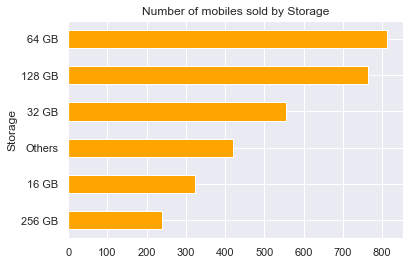

In [262]:
# number of mobiles sold by Storage
_= df.groupby('Storage')['Selling Price'].count().sort_values().plot.barh(color='orange')
plt.title('Number of mobiles sold by Storage')
plt.show()

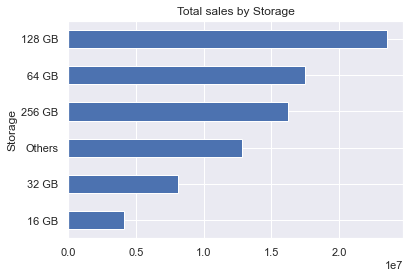

In [263]:
# total sales by storage
_ = df.groupby('Storage')['Selling Price'].sum().sort_values().plot.barh()
plt.title('Total sales by Storage')
plt.show()

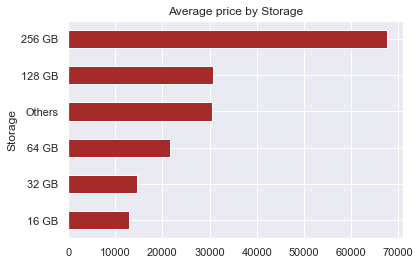

In [264]:
# average price of mobiles in each category
_ = df.groupby('Storage')['Selling Price'].mean().sort_values().plot.barh(color='brown')
plt.title('Average price by Storage')
plt.show()

- In terms of number of units sold, 64 GB mobiles are at top, closely followed by 128 GB mobiles. However, 128 GB handsets beat the 64 GB mobiles in terms of Total sales owing to higher average price.

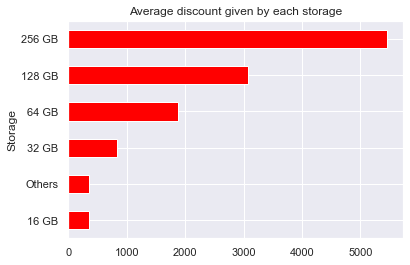

In [265]:
_ = df.groupby('Storage')['Discount'].mean().sort_values(ascending=True).plot.barh(color='red')
plt.title('Average discount given by each storage')
plt.show()

- Mobiles with 256 GB storage are offering highest discounts.

### Selling Price vs Rating

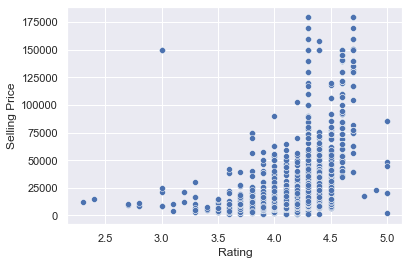

<Figure size 360x288 with 0 Axes>

In [266]:
sns.scatterplot(data=df, x=df.Rating, y=df['Selling Price'])
plt.figure(figsize=(5, 4))
plt.show()

- Most of the high-end mobiles (mobiles with price above Rs. 25000) have 4+ rating.
- However there are many low-end mobiles with 4+ rating as well.
- There are two low-end mobiles and three high-end mobiles with a perfect score.

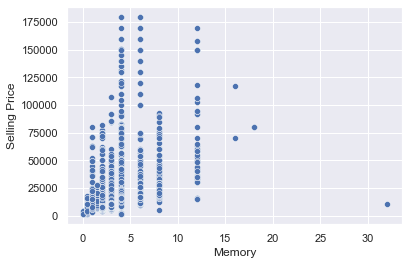

In [267]:
memory = df1.Memory.apply(lambda x: float(x.strip(' MB')) / 1024 if 'MB' in x 
                          else float(x.strip(' GB')))
sns.scatterplot(data=df, x=memory, y=df1['Selling Price'])
plt.show()